<a href="https://colab.research.google.com/github/kingjiwoo/TEST_OCR_num/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#라이브러리 프레임워크 호출
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 


#MNIST 데이터셋 호출 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#데이터 정규화 
X_train, X_test = X_train/255.0, X_test/255.0

#이미지 데이터 reshape

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [3]:
type(y_train[0])

numpy.uint8

In [4]:
# 이미지 사이즈 확인
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
# Sequential API 사용해 model 생성
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1), padding = 'same'),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Conv2D(128, (3,3), activation='relu',input_shape=(28,28,1), padding = 'same'),
                             tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding = 'valid'),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             
                             #Classifier 출력층
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(units= 10,activation='softmax')
                             
])

In [6]:
#모델 컴파일 
model.compile(optimizer=tf.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [7]:
#모델 학습 
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=100)


Epoch 1/10
600/600 [==============================] - 6s 5ms/step - loss: 0.1974 - accuracy: 0.9384 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0562 - accuracy: 0.9840 - val_loss: 0.0215 - val_accuracy: 0.9929
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0414 - accuracy: 0.9889 - val_loss: 0.0223 - val_accuracy: 0.9924
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.0233 - val_accuracy: 0.9933
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0261 - accuracy: 0.9929 - val_loss: 0.0211 - val_accuracy: 0.9927
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0210 - val_accuracy: 0.9944
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.0219 - val_accuracy: 0.9933
Epoch 

In [8]:
result = model.evaluate(X_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9945
최종 예측 성공률(%):  99.44999814033508


숫자 인식

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
#이미지 읽어 오기 
img = cv2.imread('/content/drive/MyDrive/image.png')
plt.figure(figsize=(13,12))
print('img')

img


<Figure size 936x864 with 0 Axes>

In [11]:
print(img.shape, type(img))

(246, 177, 3) <class 'numpy.ndarray'>


In [12]:
img

array([[[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [167, 173, 172],
        [167, 173, 172],
        [167, 173, 172]],

       [[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [167, 173, 172],
        [167, 173, 172],
        [167, 173, 172]],

       [[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [167, 173, 172],
        [167, 173, 172],
        [167, 173, 172]],

       ...,

       [[159, 165, 164],
        [159, 165, 164],
        [159, 165, 164],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [161, 161, 161]],

       [[159, 165, 164],
        [159, 165, 164],
        [159, 165, 164],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [161, 161, 161]],

       [[159, 165, 164],
        [159, 165, 164],
        [159, 165, 164],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [161, 161, 161]]

In [13]:
#이미지 흑백처리 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#이미지 블러 
img = cv2.GaussianBlur(img, (5,5), 0)

#이미지 내의 경계 찾기 
ret, img_th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierachy = cv2.findContours(img_th.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [14]:
#경계를 직사각형으로 찾기 
rects = [ cv2.boundingRect(each) for each in contours]

In [15]:
# 직사각형 갯수가 맞는지 점검
len(rects)

19

In [16]:
#직사각형 좌표 확인 
rects

[(30, 189, 3, 9),
 (78, 186, 14, 12),
 (112, 184, 12, 19),
 (51, 182, 13, 17),
 (110, 142, 3, 13),
 (138, 141, 15, 16),
 (87, 141, 2, 14),
 (47, 140, 14, 14),
 (26, 140, 10, 15),
 (137, 83, 2, 13),
 (28, 83, 9, 11),
 (50, 80, 10, 15),
 (84, 79, 9, 12),
 (114, 77, 9, 14),
 (25, 28, 3, 12),
 (46, 27, 16, 16),
 (82, 26, 9, 13),
 (130, 25, 12, 15),
 (110, 25, 9, 13)]

In [17]:
#직사각형 정렬, 두번째 원소 5개 단위로, 첫번째 원소 오름 차순 
rects.sort(key=lambda x: (x[1], x[0]))

In [18]:
#정렬 확인
rects

[(110, 25, 9, 13),
 (130, 25, 12, 15),
 (82, 26, 9, 13),
 (46, 27, 16, 16),
 (25, 28, 3, 12),
 (114, 77, 9, 14),
 (84, 79, 9, 12),
 (50, 80, 10, 15),
 (28, 83, 9, 11),
 (137, 83, 2, 13),
 (26, 140, 10, 15),
 (47, 140, 14, 14),
 (87, 141, 2, 14),
 (138, 141, 15, 16),
 (110, 142, 3, 13),
 (51, 182, 13, 17),
 (112, 184, 12, 19),
 (78, 186, 14, 12),
 (30, 189, 3, 9)]

In [19]:
#리스트 5개 단위로 나누고, 정렬, 다시 합치기
def list_chunk(lst, n):
    lists_chunked = [lst[i:i+n] for i in range(0, len(lst), n)]
    imgs_chunked = list(map(sorted, lists_chunked))
    rects = sum(imgs_chunked, [])
    return rects

rects = list_chunk(rects, 5)
print(rects)

[(25, 28, 3, 12), (46, 27, 16, 16), (82, 26, 9, 13), (110, 25, 9, 13), (130, 25, 12, 15), (28, 83, 9, 11), (50, 80, 10, 15), (84, 79, 9, 12), (114, 77, 9, 14), (137, 83, 2, 13), (26, 140, 10, 15), (47, 140, 14, 14), (87, 141, 2, 14), (110, 142, 3, 13), (138, 141, 15, 16), (30, 189, 3, 9), (51, 182, 13, 17), (78, 186, 14, 12), (112, 184, 12, 19)]


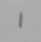

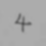

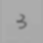

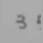

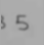

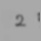

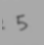

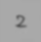

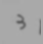

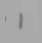

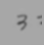

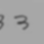

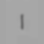

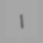

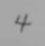

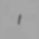

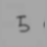

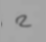

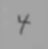

In [20]:
from google.colab.patches import cv2_imshow
#추출한 숫자 영역 전처리 
img_classify = img.copy()

#최종 이미지 파일용 배열 
mnist_imgs =[]
margin_pixel = 15

#숫자 영역 추출 및 reshape(28,28,1)

for rect in rects:
    im = img_classify[rect[1]-margin_pixel:rect[1]+rect[3]+margin_pixel, rect[0]-margin_pixel:rect[0]+rect[2]+margin_pixel]
    row, col = im.shape[:2]

    # 정방형 비율을 맞춰주기 위해 변수 이용
    bordersize = max(row, col)
    diff = min(row,col)

    # 이미지의 intensity의 평균을 구함
    bottom = im[row-2:row, 0:col]
    mean = cv2.mean(bottom)[0]

    # border 추가해 정방형 비율로 보정 
    border = cv2.copyMakeBorder(
        im,
        top=0,
        bottom=0,
        left = int((bordersize-diff)/2),
        right = int((bordersize-diff)/2),
        borderType = cv2.BORDER_CONSTANT,
        value = [mean, mean, mean]
    )

    square=border
    cv2_imshow(square)
    #square 사이즈 (28,28)로 
    resize_img = cv2.resize(square, dsize=(28,28), interpolation = cv2.INTER_AREA)
    mnist_imgs.append(resize_img)

In [21]:
for i in range(len(mnist_imgs)):
    img = mnist_imgs[i]
    cv2_imshow(img)
    #사이즈 변환
    img = img.reshape(-1,28,28,1)
    #데이터 정규화 
    input_data = ((np.array(img)/255) - 1) * -1
    
    # 결과 
    res = np.argmax(model.predict(input_data), axis = -1)

    print(res)

1/1 [==============================] - 0s 127ms/step
[1]


1/1 [==============================] - 0s 17ms/step
[1]


1/1 [==============================] - 0s 18ms/step
[1]


1/1 [==============================] - 0s 16ms/step
[1]


1/1 [==============================] - 0s 17ms/step
[1]


1/1 [==============================] - 0s 17ms/step
[1]


1/1 [==============================] - 0s 17ms/step
[9]


1/1 [==============================] - 0s 16ms/step
[1]


1/1 [==============================] - 0s 15ms/step
[1]


1/1 [==============================] - 0s 16ms/step
[1]


1/1 [==============================] - 0s 16ms/step
[9]


1/1 [==============================] - 0s 17ms/step
[9]


1/1 [==============================] - 0s 17ms/step
[1]


1/1 [==============================] - 0s 15ms/step
[1]


1/1 [==============================] - 0s 17ms/step
[1]


1/1 [==============================] - 0s 16ms/step
[1]


1/1 [==============================] - 0s 16ms/step
[1]


1/1 [==============================] - 0s 15ms/step
[1]


1/1 [==============================] - 0s 16ms/step
[1]


In [22]:
len(mnist_imgs)

19